**# Exploring The Academic Path: Background Strands of 2nd Year CCS Students in Senior High School**
---



1. Data Loading, Cleaning and Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('background_strand_dataset.csv')
df.fillna(df.mean(numeric_only=True), inplace=True)
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df = df[df['AGE'] >= 0]
df.head()

,SEX,AGE,COURSE_YEAR_SECTION,SHS_STRAND,Strand_Alignment_Q1,Strand_Alignment_Q2,Strand_Alignment_Q3,Learning_Adaptability_Q1,Learning_Adaptability_Q2,Learning_Adaptability_Q3,Learning_Adaptability_Q4,Learning_Adaptability_Q5
0,Female,19,BSIT 2D,ICT,5,5,5,5,5,3,3,5
1,Male,20,BSIT 2D,STEM,4,4,5,5,4,4,4,5
2,Male,19,BSIT 2D,GAS,5,3,2,3,5,2,2,1
3,Male,19,BSIT 2D,GAS,3,3,3,3,4,1,1,1
4,Female,19,BSIT 2D,STEM,5,4,5,5,5,3,4,5


2. Data Visualization for Distribution of Sex

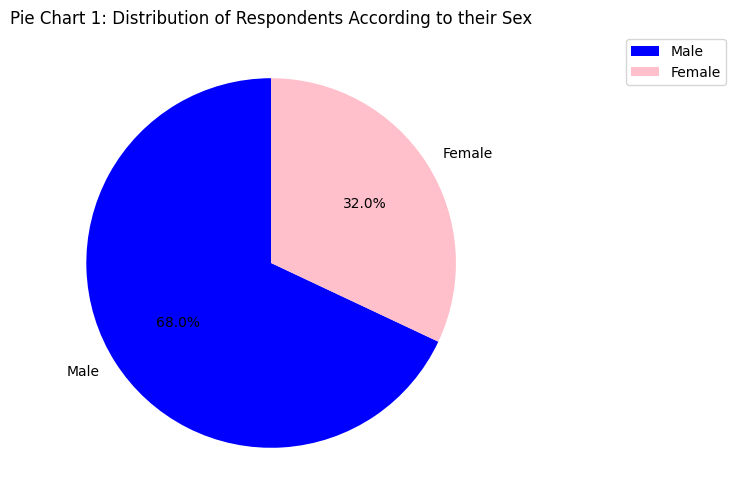

In [ ]:
sex_counts = df['SEX'].value_counts()
plt.figure(figsize=(6, 6))
colors = ['blue', 'pink']

plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.legend(sex_counts.index, loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Pie Chart 1: Distribution of Respondents According to their Sex')
plt.show()

3. Data Visualization for Distribution of Age

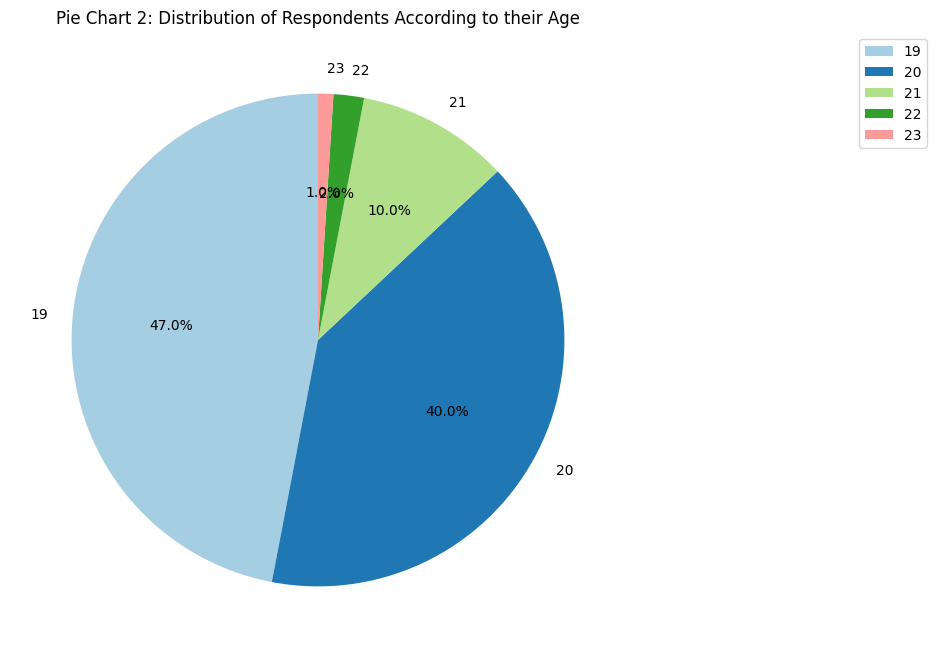

In [ ]:
age_counts = df['AGE'].value_counts()
age_counts = age_counts.sort_index()
colors = plt.cm.Paired(range(len(age_counts)))

plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.legend(age_counts.index, loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Pie Chart 2: Distribution of Respondents According to their Age')
plt.show()

4. Data Visualization for Distribution of Course, Year & Section

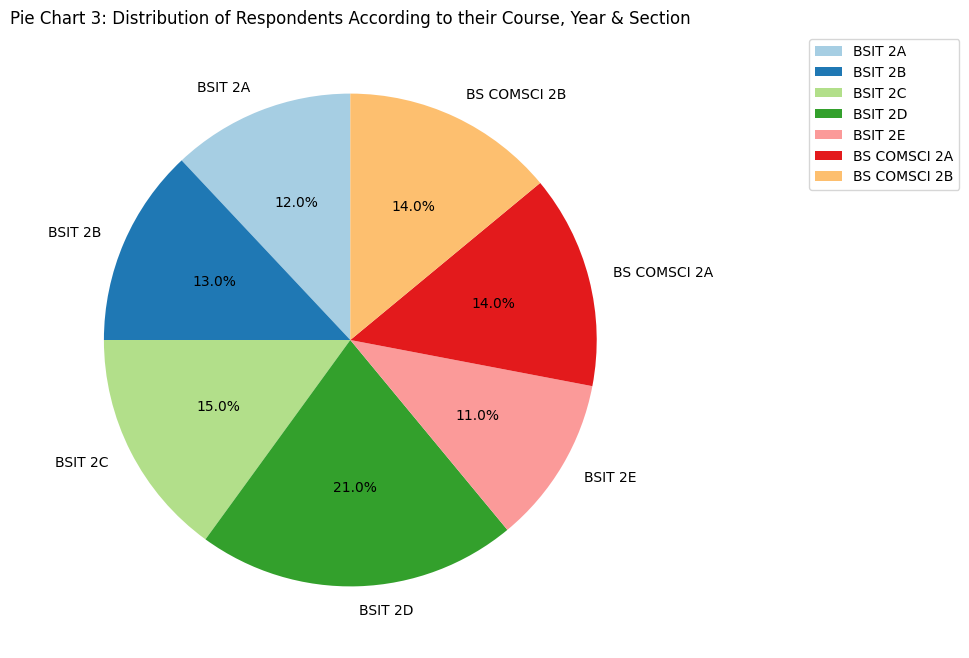

In [ ]:
cys_counts = df['COURSE_YEAR_SECTION'].value_counts()
desired_order = ['BSIT 2A', 'BSIT 2B', 'BSIT 2C', 'BSIT 2D', 'BSIT 2E', 'BS COMSCI 2A', 'BS COMSCI 2B']

cys_counts = cys_counts.reindex(desired_order)
cys_counts = cys_counts.dropna()
colors = plt.cm.Paired(range(len(cys_counts)))

plt.figure(figsize=(8, 8))
plt.pie(cys_counts, labels=cys_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.legend(cys_counts.index, loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Pie Chart 3: Distribution of Respondents According to their Course, Year & Section')
plt.show()


5. Data Visualization for Distribution of SHS Strand

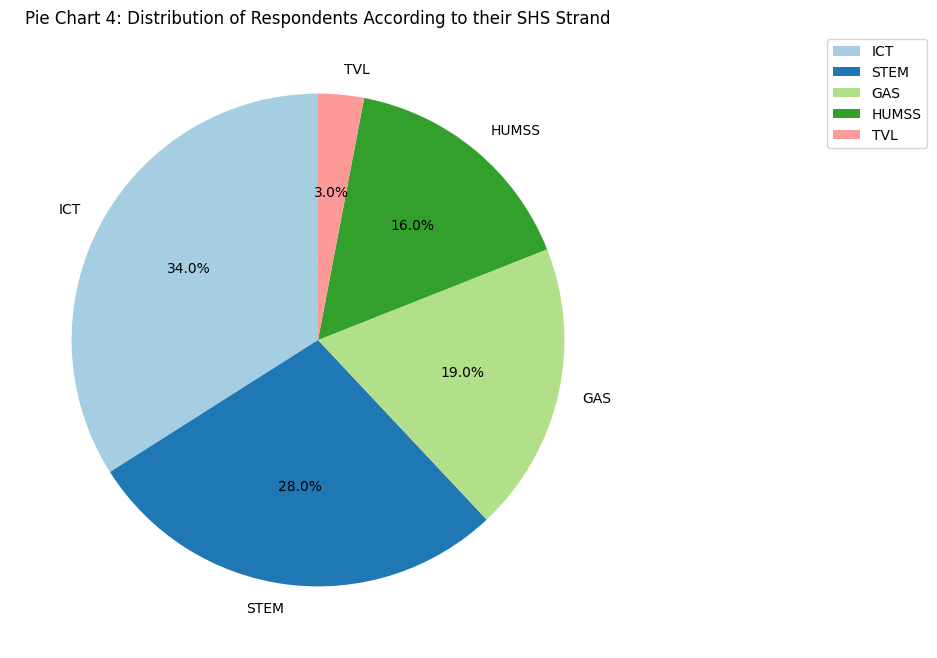

In [ ]:
strand_counts = df['SHS_STRAND'].value_counts()
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(len(strand_counts)))

plt.pie(strand_counts, labels=strand_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.legend(strand_counts.index, loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Pie Chart 4: Distribution of Respondents According to their SHS Strand')
plt.show()

6. Data Visualization for Strand Alignment Satisfactory


Weighted Mean:
Strand_Alignment_Q1    4.17
Strand_Alignment_Q2    3.86
Strand_Alignment_Q3    3.73
dtype: float64

Overall Weighted Mean:  3.92


ICT Weighted Mean:
Strand_Alignment_Q1    4.91
Strand_Alignment_Q2    4.82
Strand_Alignment_Q3    4.94
dtype: float64

ICT Overall Weighted Mean:  4.89


STEM Weighted Mean:
Strand_Alignment_Q1    4.61
Strand_Alignment_Q2    4.43
Strand_Alignment_Q3    4.46
dtype: float64

STEM Overall Weighted Mean:  4.5


HUMSS Weighted Mean:
Strand_Alignment_Q1    2.94
Strand_Alignment_Q2    2.06
Strand_Alignment_Q3    1.50
dtype: float64

HUMSS Overall Weighted Mean:  2.17


GAS Weighted Mean:
Strand_Alignment_Q1    3.21
Strand_Alignment_Q2    2.89
Strand_Alignment_Q3    2.53
dtype: float64

GAS Overall Weighted Mean:  2.88


TVL Weighted Mean:
Strand_Alignment_Q1    4.33
Strand_Alignment_Q2    3.33
Strand_Alignment_Q3    2.67
dtype: float64

TVL Overall Weighted Mean:  3.44





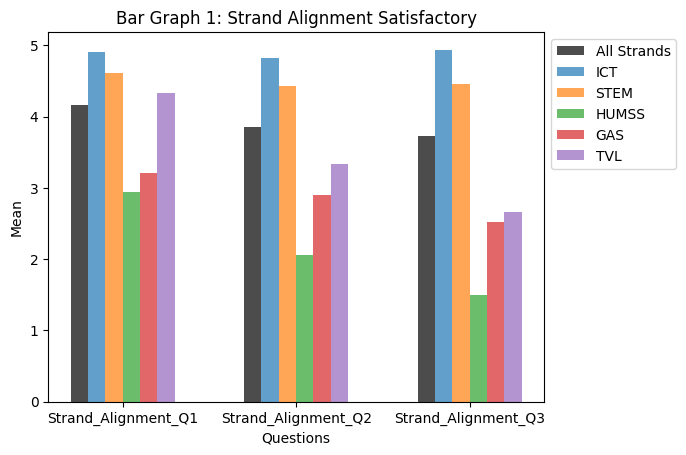

In [ ]:
overall_mean_values = df[['Strand_Alignment_Q1', 'Strand_Alignment_Q2', 'Strand_Alignment_Q3']].mean()
overall_weighted_mean = df[['Strand_Alignment_Q1', 'Strand_Alignment_Q2', 'Strand_Alignment_Q3']].mean().mean()
strands = ['ICT', 'STEM', 'HUMSS', 'GAS', 'TVL']
strand_mean_values = {}

print(f'\nWeighted Mean:')
print(overall_mean_values.round(2))
print(f'\nOverall Weighted Mean: ', overall_weighted_mean.round(2))
print()

bar_width = 0.1
bar_positions = np.arange(len(overall_mean_values))
plt.bar(bar_positions, overall_mean_values.values, width=bar_width, label='All Strands', alpha=0.7, color='black')

for i, strand in enumerate(strands):
    strand_df = df[df['SHS_STRAND'] == strand]
    strand_mean_values[strand] = strand_df[['Strand_Alignment_Q1', 'Strand_Alignment_Q2', 'Strand_Alignment_Q3']].mean()
    strand_overall_weighted_mean = strand_df[['Strand_Alignment_Q1', 'Strand_Alignment_Q2', 'Strand_Alignment_Q3']].mean().mean()
    plt.bar(bar_positions + (i + 1) * bar_width, strand_mean_values[strand].values, width=bar_width, label=strand, alpha=0.7)

    print(f'\n{strand} Weighted Mean:')
    print(strand_mean_values[strand].round(2))
    print(f'\n{strand} Overall Weighted Mean: ', strand_overall_weighted_mean.round(2))
    print()

print(f'\n')
combined_labels = list(overall_mean_values.index)
plt.xticks(bar_positions + (len(strands) / 2) * bar_width, combined_labels)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Bar Graph 1: Strand Alignment Satisfactory')
plt.xlabel('Questions')
plt.ylabel('Mean')
plt.show()

2. Data Visualization for Learning Adaptability


Weighted Mean:
Learning_Adaptability_Q1    4.18
Learning_Adaptability_Q2    4.27
Learning_Adaptability_Q3    3.15
Learning_Adaptability_Q4    3.58
Learning_Adaptability_Q5    3.35
dtype: float64

Overall Weighted Mean:  3.71


ICT Weighted Mean:
Learning_Adaptability_Q1    4.82
Learning_Adaptability_Q2    4.79
Learning_Adaptability_Q3    4.38
Learning_Adaptability_Q4    4.65
Learning_Adaptability_Q5    4.50
dtype: float64

ICT Overall Weighted Mean:  4.63


STEM Weighted Mean:
Learning_Adaptability_Q1    4.61
Learning_Adaptability_Q2    4.68
Learning_Adaptability_Q3    3.50
Learning_Adaptability_Q4    4.04
Learning_Adaptability_Q5    3.82
dtype: float64

STEM Overall Weighted Mean:  4.13


HUMSS Weighted Mean:
Learning_Adaptability_Q1    3.12
Learning_Adaptability_Q2    3.38
Learning_Adaptability_Q3    1.62
Learning_Adaptability_Q4    2.31
Learning_Adaptability_Q5    2.19
dtype: float64

HUMSS Overall Weighted Mean:  2.52


GAS Weighted Mean:
Learning_Adaptability_Q1    3.37
Learning_

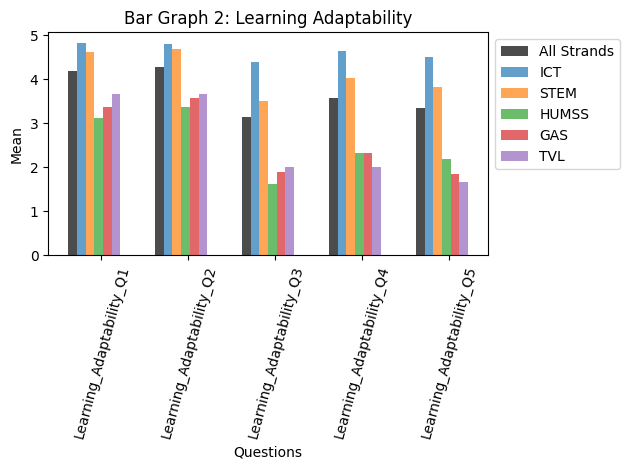

In [ ]:
overall_mean_values = df[['Learning_Adaptability_Q1', 'Learning_Adaptability_Q2', 'Learning_Adaptability_Q3', 'Learning_Adaptability_Q4', 'Learning_Adaptability_Q5']].mean()
overall_weighted_mean = df[['Learning_Adaptability_Q1', 'Learning_Adaptability_Q2', 'Learning_Adaptability_Q3', 'Learning_Adaptability_Q4', 'Learning_Adaptability_Q5']].mean().mean()
strands = ['ICT', 'STEM', 'HUMSS', 'GAS', 'TVL']
strand_mean_values = {}

print(f'\nWeighted Mean:')
print(overall_mean_values.round(2))
print(f'\nOverall Weighted Mean: ', overall_weighted_mean.round(2))
print()

bar_width = 0.1
bar_positions = np.arange(len(overall_mean_values))
plt.bar(bar_positions, overall_mean_values.values, width=bar_width, label='All Strands', alpha=0.7, color='black')

for i, strand in enumerate(strands):
    strand_df = df[df['SHS_STRAND'] == strand]
    strand_mean_values[strand] = strand_df[['Learning_Adaptability_Q1', 'Learning_Adaptability_Q2', 'Learning_Adaptability_Q3', 'Learning_Adaptability_Q4', 'Learning_Adaptability_Q5']].mean()
    strand_overall_weighted_mean = strand_df[['Learning_Adaptability_Q1', 'Learning_Adaptability_Q2', 'Learning_Adaptability_Q3', 'Learning_Adaptability_Q4', 'Learning_Adaptability_Q5']].mean().mean()
    plt.bar(bar_positions + (i + 1) * bar_width, strand_mean_values[strand].values, width=bar_width, label=strand, alpha=0.7)

    print(f'\n{strand} Weighted Mean:')
    print(strand_mean_values[strand].round(2))
    print(f'\n{strand} Overall Weighted Mean: ', strand_overall_weighted_mean.round(2))
    print()

print(f'\n')
combined_labels = list(overall_mean_values.index)
plt.xticks(bar_positions + (len(strands) / 1.5) * bar_width, combined_labels, rotation=75, ha='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Bar Graph 2: Learning Adaptability')
plt.xlabel('Questions')
plt.ylabel('Mean')
plt.tight_layout()
plt.show()
